In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
def sigmoid(x):
    return 1/(1 + np.e**-x)

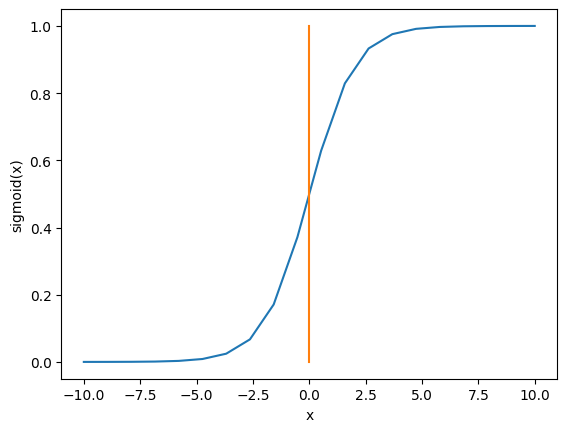

In [3]:
x = np.linspace(-10, 10, 20)

z = sigmoid(x)

plt.plot(x, z)
plt.plot(np.zeros(6), [0,0.2,0.4,0.6,0.8,1])
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.show()

In [4]:
a = np.array([[2,3], [4,1], [5,4], [8,8], [9,1], [2,6]])

b = np.array([0,0,1,1,0,1])

In [5]:
df = pd.DataFrame(a, columns=["x1", "x2"])

df["y"] = b

df

,x1,x2,y
0,2,3,0
1,4,1,0
2,5,4,1
3,8,8,1
4,9,1,0
5,2,6,1


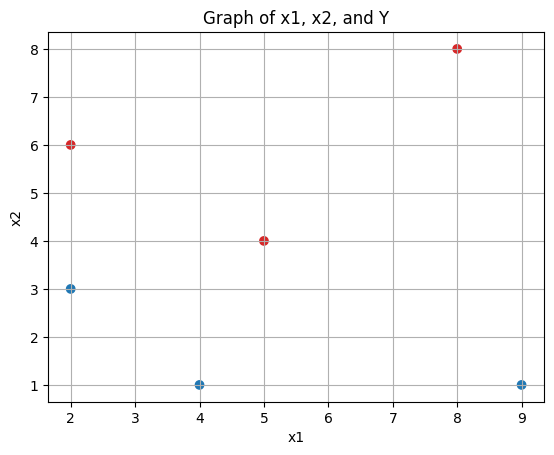

In [6]:
colors = {0:'tab:blue', 1:'tab:red'}
plt.scatter(a[:, 0], a[:, 1], c = df["y"].map(colors))
plt.title("Graph of x1, x2, and Y")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()

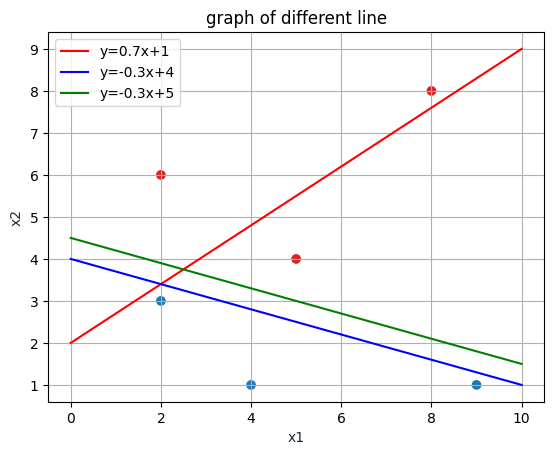

In [9]:
x = np.linspace(0, 10, 100)
plt.scatter(a[:, 0], a[:, 1], c = df["y"].map(colors))

y = 0.7*x+2
plt.plot(x, y, '-r', label="y=0.7x+1")

y = -0.3*x+4
plt.plot(x,y, "-b", label = "y=-0.3x+4")

y = -0.3*x+4.5
plt.plot(x,y,'-g', label="y=-0.3x+5")

plt.title("graph of different line")
plt.xlabel("x1", color="#1C2833")
plt.ylabel("x2", color="#1C2833")
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

In [8]:
def sigmoid(x):
    return 1/(1 + np.e**-x)

def NegativeLogLikelihood(y, yhat):
    return - (y * np.log(yhat) + (1-y) * np.log(1-yhat))

In [10]:
# Compute the sigmoid values
df['x2_green'] = -0.3*df['x1'] + 4.5
df['x2_blue'] = -0.3*df['x1'] + 4
df['x2_red'] = 0.7*df['x1'] + 2

# Find the distance between each line to the corresponding query point
df['dist_green'] = df['x2'] - df['x2_green']
df['dist_blue'] = df['x2'] - df['x2_blue']
df['dist_red'] = df['x2'] - df['x2_red']

# Convert the distance to probability using sigmoid function
df['prob_green'] = sigmoid(df['dist_green'])
df['prob_blue'] = sigmoid(df['dist_blue'])
df['prob_red'] = sigmoid(df['dist_red'])

# compute the negetive log likelihood loss for each line
df['NLL_green'] = NegativeLogLikelihood(df['y'], df['prob_green'])
df['NLL_blue'] = NegativeLogLikelihood(df['y'], df['prob_blue'])    
df['NLL_red'] = NegativeLogLikelihood(df['y'], df['prob_red'])

# sum of negative log likelihood loss for each line
print("Likelyhood Loss for green line: ", df['NLL_green'].sum())
print("Likelyhood Loss for blue line: ", df['NLL_blue'].sum())
print("Likelyhood Loss for red line: ", df['NLL_red'].sum())

Likelyhood Loss for green line:  1.2393169153543424
Likelyhood Loss for blue line:  1.4950662557590215
Likelyhood Loss for red line:  2.821888001906791


#### So green line is the current best fit line for this classification

### Now we build our first Logistic Regression Model from scratch

In [ ]:
# for bind the y values in a range of 0 to 1
def sigmoid(x):
    return 1/(1 + np.e**-x)

In [30]:
# for find the Y values
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))


In [13]:
# cost function / error function Naegative Log Likelihood
def error(X, y, theta):
    yhat = hypothesis(X, theta)
    err = np.mean(y*np.log(yhat) + (1-y)*np.log(1-yhat))
    return -err

In [14]:
# Compute the gradient
def gradient(X, y, theta):
    yhat = hypothesis(X, theta)
    grad = (np.dot(X.T, (yhat -y)))
    return grad/X.shape[0]  # average over all samples

In [33]:
def gradient_descent(X, y, learning_rate = 0.5, iterations = 30):
    error_list = []
    theta = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        grad = gradient(X, y, theta)
        theta = theta - learning_rate * grad
        err = error(X, y, theta)
        error_list.append(err)
        if i % 1000 == 0:
            print(f"Error at iteration {i}: {err}")
    return (theta/X.shape[1], error_list)

In [16]:
# creating data
from sklearn.datasets import make_classification

In [17]:
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=5
)


In [18]:
X.shape

(500, 2)

In [19]:
y.shape

(500,)

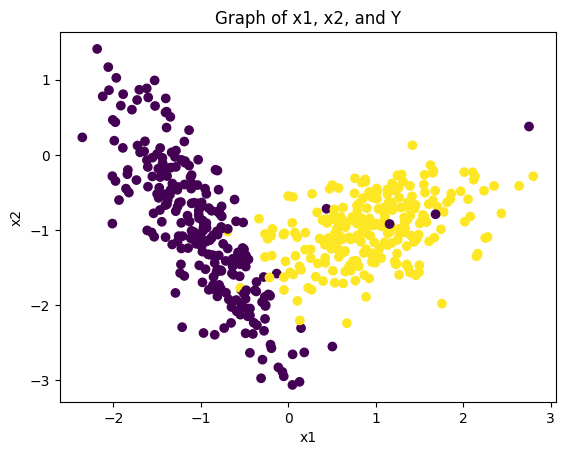

In [21]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title("Graph of x1, x2, and Y")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [23]:
ones = np.ones((500, 1))
X_ = np.hstack((ones, X))
X_[:5]

array([[ 1.        ,  1.22167239, -0.4757541 ],
       [ 1.        , -0.2292072 , -1.85663378],
       [ 1.        , -1.34913896,  0.50458721],
       [ 1.        ,  0.31402206, -1.62029248],
       [ 1.        ,  1.13807877, -0.99148158]])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

In [34]:
opt_theta, err_list = gradient_descent(X_train, y_train)

Error at iteration 0: 0.48134908230358414


In [35]:
opt_theta[:5]

array([[ 0.65740311, -0.65740311, -0.65740311, ...,  0.65740311,
         0.65740311,  0.65740311],
       [-0.05980583,  0.05980583,  0.05980583, ..., -0.05980583,
        -0.05980583, -0.05980583],
       [-0.45049877,  0.45049877,  0.45049877, ..., -0.45049877,
        -0.45049877, -0.45049877]], shape=(3, 400))

### build Logistic Regression using sklearn

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logistic = LogisticRegression()


In [38]:
logistic.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
logistic.intercept_

array([1.47191488])

In [40]:
logistic.coef_

array([[-1.47624739e-03,  3.89638974e+00,  8.51637292e-01]])

In [41]:
y_pred = logistic.predict(X_test)

#### We use accuracy score and confusion matrix as error matrix to do a accuracy test

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score


In [43]:
confusion_matrix(y_test, y_pred)

array([[47,  3],
       [ 2, 48]])

In [44]:
accuracy_score(y_test, y_pred)

0.95

In [46]:
precision_score(y_test, y_pred)

0.9411764705882353

In [47]:
recall_score(y_test, y_pred)

0.96

In [48]:
prob = logistic.predict_proba(X_test)

In [50]:
prob[1]

array([0.01820163, 0.98179837])